# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [342]:
# Your code here
import pandas as pd
import matplotlib.pyplot

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [344]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [346]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [348]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [350]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [352]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [354]:
df.duplicated().value_counts() # Determining if there is missing data in our dataset

False    1460
Name: count, dtype: int64

In [388]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [460]:
type(df)

pandas.core.frame.DataFrame

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

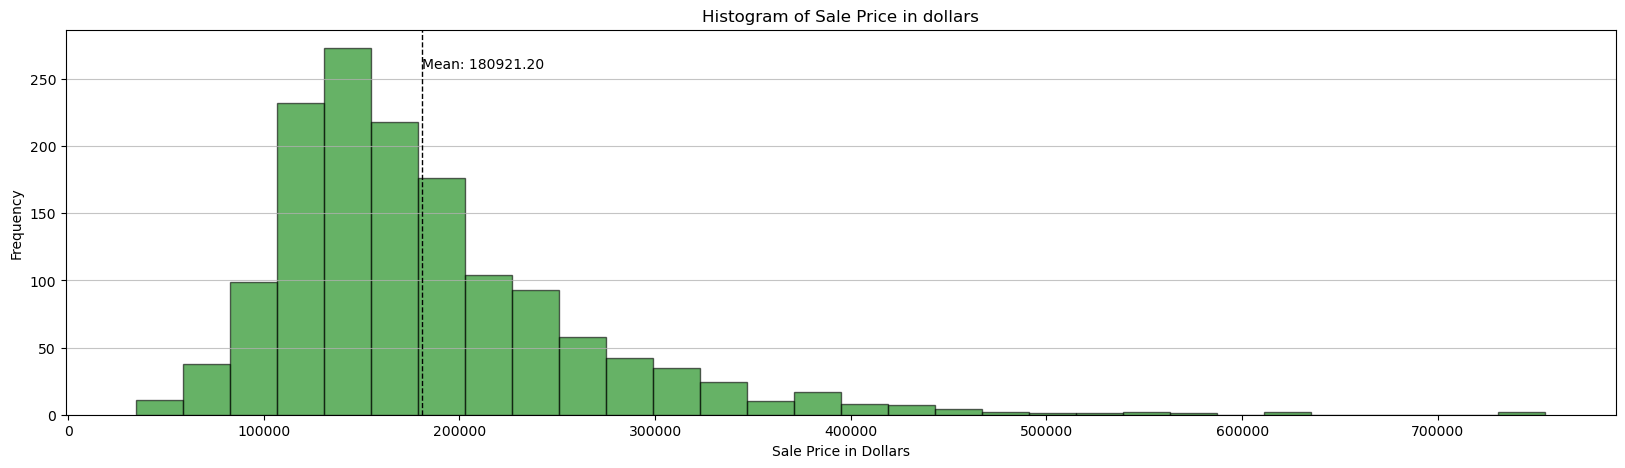

In [705]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('data/ames.csv', index_col=0)

# Function to create a histogram with mean line
def plot_histogram(column, title, xlabel):
    plt.figure(figsize=(20, 5))
    plt.hist(data[column], bins=30, color='green', edgecolor='black', alpha=0.6)
    mean_value = data[column].mean()
    plt.axvline(mean_value, color='black', linestyle='dashed', linewidth=1)
    plt.text(mean_value, plt.ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Plot histograms for SalePrice
plot_histogram('SalePrice', 'Histogram of Sale Price in dollars', 'Sale Price in Dollars')


Now, print out the mean, median, and standard deviation:

In [538]:
df['SalePrice']

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [540]:
# Your code here
df['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [542]:
#mean
mean_ = df['SalePrice'].mean()
mean_

180921.19589041095

In [544]:
# median
median_ = df['SalePrice'].median()
median_

163000.0

In [546]:
# std dev
standard_deviation_ = df['SalePrice'].std()
standard_deviation_

79442.50288288663

In [548]:
print(f"Mean is {mean_:.2f}")
print(f"Median is {median_:.2f}")
print(f"Standard Deviation is {standard_deviation_:.2f}")
print("\n")

Mean is 180921.20
Median is 163000.00
Standard Deviation is 79442.50




In the cell below, interpret the above information.

In [649]:
# Replace None with appropriate text
"""The histogram  plotted above  shows  the independent variable which is the sale price of houses in dollars on the x axis  and the dependent variable frequency (number of houses)  across  the  distributed data set  in Ames.The shape of the histrogram graph is  asymmetrical towards the right making it a right skewed graph.The visual  representation of the Sale Prices of houses in dollars data has a longer tail stretching towards the right after the median line.The  dataset is also  right skewed  because the mean value of sale price is greater than the median value of sale price.The mean line  helps us to understand the central tendecy of the data.The analysis on the above histogram shows how the real estate companies can derive insights affecting  the house market prices in Ames area : One can determine the quality of houses in Ames bought,the most common range price for houses bought in Ames and the most affordable and expensive homes in Ames.There are also other external factors affecting the sale price like the population in Ames ,size of rooms,security and the income of residents in Ames
"""


'The histogram  plotted above  shows  the independent variable which is the sale price of houses in dollars on the x axis  and the dependent variable frequency (number of houses)  across  the  distributed data set  in Ames.The shape of the histrogram graph is  asymmetrical towards the right making it a right skewed graph.The visual  representation of the Sale Prices of houses in dollars data has a longer tail stretching towards the right after the median line.The  dataset is also  right skewed  because the mean value of sale price is greater than the median value of sale price.The mean line  helps us to understand the central tendecy of the data.The analysis on the above histogram shows how the real estate companies can derive insights affecting  the house market prices in Ames area : One can determine the quality of houses in Ames bought,the most common range price for houses bought in Ames and the most affordable and expensive homes in Ames.There are also other external factors affec

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

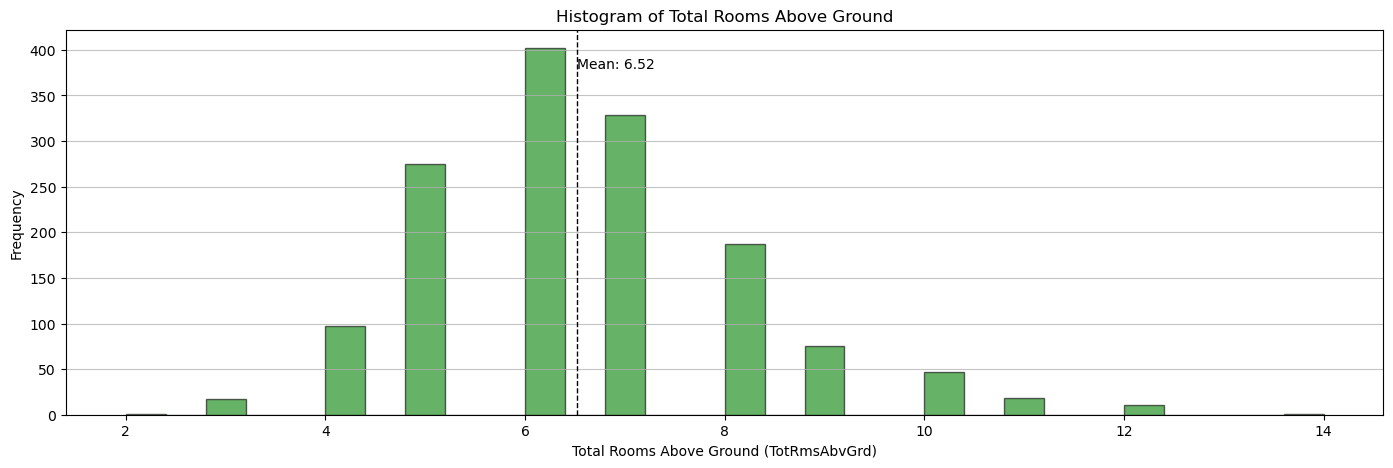

In [554]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('data/ames.csv', index_col=0)

# Function to create a histogram with mean line
def plot_histogram(column, title, xlabel):
    plt.figure(figsize=(17, 5))
    plt.hist(data[column], bins=30, color='green', edgecolor='black', alpha=0.6)
    mean_value = data[column].mean()
    plt.axvline(mean_value, color='black', linestyle='dashed', linewidth=1)
    plt.text(mean_value, plt.ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Plot histograms for total rooms above ground
plot_histogram('TotRmsAbvGrd', 'Histogram of Total Rooms Above Ground', 'Total Rooms Above Ground (TotRmsAbvGrd)')

Now, print out the mean, median, and standard deviation:

In [556]:
df['TotRmsAbvGrd']

Id
1       8
2       6
3       6
4       7
5       9
       ..
1456    7
1457    7
1458    9
1459    5
1460    6
Name: TotRmsAbvGrd, Length: 1460, dtype: int64

In [558]:
# Your code here

df['TotRmsAbvGrd'].describe()

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

In [560]:
# mean
mean_2 = df['TotRmsAbvGrd'].mean()
mean_2

6.517808219178082

In [562]:
# median
median_2 = df['TotRmsAbvGrd'].median()
median_2

6.0

In [382]:
# std dev
standard_deviation_2 = df['TotRmsAbvGrd'].std()
standard_deviation_2

1.625393290584064

In [564]:
print(f"Mean is {mean_2:.2f}")
print(f"Median is {median_2:.2f}")
print(f"Standard Deviation is {standard_deviation_2:.2f}")
print("\n")

Mean is 6.52
Median is 6.00
Standard Deviation is 1.63




In the cell below, interpret the above information.

In [653]:
# Replace None with appropriate text
"""
The histogram  plotted above  shows  the independent variable  which is total rooms  above on the x axis and frequency(no of houses) on y axis which is the dependent variable across the dataset distribution .The shape of the histrogram is a right skewed graph because the tail on the right side after the mean  line tends to bend  lower towards the houses with more number of rooms above the ground.The mean line helps us to understand the central tendency in the data set.The mean is also higher than the median. In the above  the analysis the insights are showing the houses with highest and lowest number of total  rooms above ground  tend to be occupied by few people in relation to other external factors such as prices of houses,income of people , number of family members and size of rooms in Ames area.Most houses with average total rooms above the ground  in Ames area tend to be occupied by more people.  
"""

'\nThe histogram  plotted above  shows  the independent variable  which is total rooms  above on the x axis and frequency(no of houses) on y axis which is the dependent variable across the dataset distribution .The shape of the histrogram is a right skewed graph because the tail on the right side after the mean  line tends to bend  lower towards the houses with more number of rooms above the ground.The mean line helps us to understand the central tendency in the data set.The mean is also higher than the median. In the above  the analysis the insights are showing the houses with highest and lowest number of total  rooms above ground  tend to be occupied by few people in relation to other external factors such as prices of houses,income of people , number of family members and size of rooms in Ames area.Most houses with average total rooms above the ground  in Ames area tend to be occupied by more people.  \n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

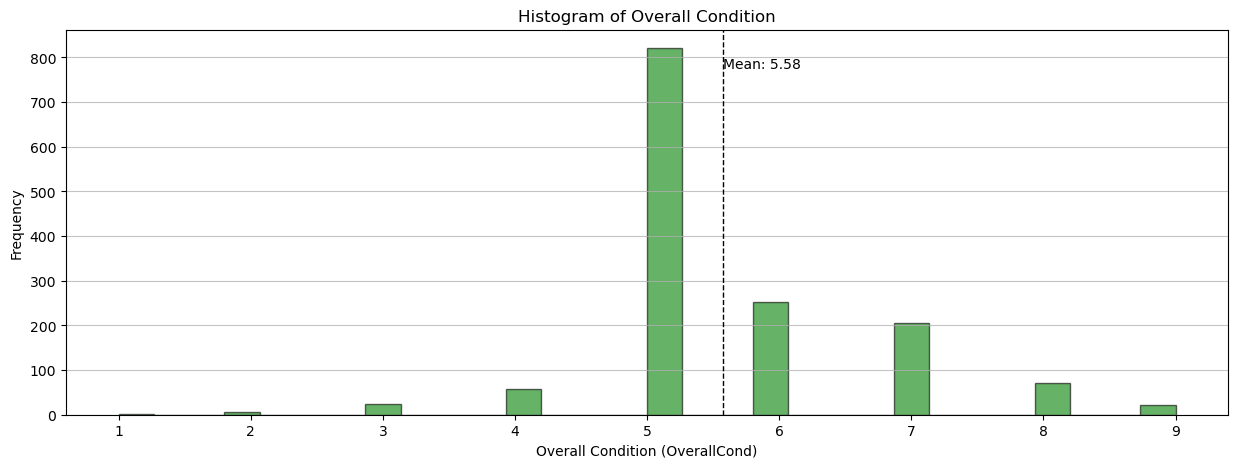

In [709]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('data/ames.csv', index_col=0)

# Function to create a histogram with mean line
def plot_histogram(column, title, xlabel):
    plt.figure(figsize=(15, 5))
    plt.hist(data[column], bins=30, color='green', edgecolor='black', alpha=0.6)
    mean_value = data[column].mean()
    plt.axvline(mean_value, color='black', linestyle='dashed', linewidth=1)
    plt.text(mean_value, plt.ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Plot histograms for OverallCond
plot_histogram('OverallCond', 'Histogram of Overall Condition', 'Overall Condition (OverallCond)')


Now, print out the mean, median, and standard deviation:

In [598]:
# Your code here
df['OverallCond'].describe()

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

In [600]:
# mean ,median and std deviation
mean_3 = df['OverallCond'].mean()
mean_3

5.575342465753424

In [602]:
median_3 = df['OverallCond'].median()
median_3

5.0

In [604]:
standard_deviation_3 = df['OverallCond'].std()
standard_deviation_3

1.1127993367127367

In [606]:
print(f"Mean is {mean_3:.2f}")
print(f"Median is {median_3:.2f}")
print(f"Standard Deviation is {standard_deviation_3:.2f}")
print("\n")

Mean is 5.58
Median is 5.00
Standard Deviation is 1.11




In the cell below, interpret the above information.

In [663]:
# Replace None with appropriate text
"""The histogram  plotted above  shows  the independent variable  which is Overall Condition  above on the x axis and frequency(no of houses) on y axis which is the dependent variable across the dataset distribution.The houses with lowest overall  conditions  tend to be occupied  by lower number of people in Ames due to  lower ratings in the market and negative reviews from people in Ames.Most houses with average conditions tend to be bought by a large population in Ames due to its affordability and good remarks while the houses with best conditions tend to be more  expensive,highest ratings and only few people can afford to buy from the real estate companies.The dataset is influenced with other external factors such as rating scores,number of rooms,price of houses and income factors.  
"""

'The histogram  plotted above  shows  the independent variable  which is Overall Condition  above on the x axis and frequency(no of houses) on y axis which is the dependent variable across the dataset distribution.The houses with lowest overall  conditions  tend to be occupied  by lower number of people in Ames due to  lower ratings in the market and negative reviews from people in Ames.Most houses with average conditions tend to be bought by a large population in Ames due to its affordability and good remarks while the houses with best conditions tend to be more  expensive,highest ratings and only few people can afford to buy from the real estate companies.The dataset is influenced with other external factors such as rating scores,number of rooms,price of houses and income factors.  \n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [ ]:
# Replace None with appropriate code
#below_average_condition = df
#average_condition = None
#above_average_condition = None

In [616]:
# Code below
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [454]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

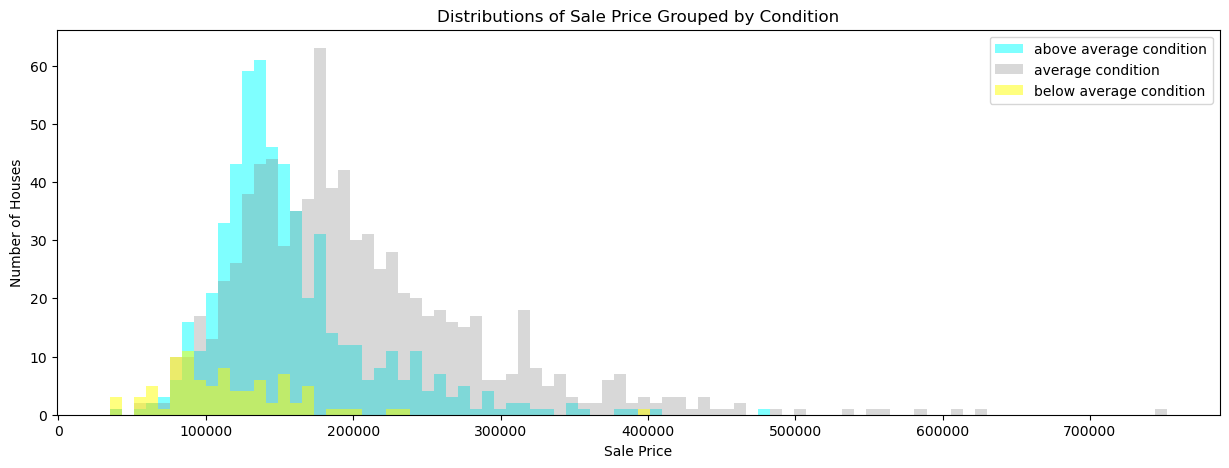

In [440]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [669]:
# Replace None with appropriate text
"""The plot  above shows  how the sale prices of houses are distributed across three different categories of overall condition: above average, average, and below average in Ames area . The degree of overlap between the histograms can provide insights into how much the condition of a house affects its sale price in regards to external factors such as affordabilty, income of people ,market prices,number of family size and security in Ames.
"""

'The plot  above shows  how the sale prices of houses are distributed across three different categories of overall condition: above average, average, and below average in Ames area . The degree of overlap between the histograms can provide insights into how much the condition of a house affects its sale price in regards to external factors such as affordabilty, income of people ,market prices,number of family size and security in Ames.\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [624]:
# Your code here
import pandas as pd

# Load your dataset
data = pd.read_csv('data/ames.csv', index_col=0)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Get the correlation values for SalePrice, excluding itself
saleprice_correlations = correlation_matrix['SalePrice'].drop('SalePrice')

# Find the column with the highest positive correlation with SalePrice
most_positive_corr_column = saleprice_correlations.idxmax()
most_positive_corr_value = saleprice_correlations.max()# the highest maximum value0
print(f"The most positively correlated column with SalePrice: {most_positive_corr_column}")
print(f"Pearson correlation: {most_positive_corr_value:.4f}\n")

The most positively correlated column with SalePrice: OverallQual
Pearson correlation: 0.7910



Now, find the ***most negatively correlated*** column:

In [628]:
# Your code here
import pandas as pd

# Load your dataset
data = pd.read_csv('data/ames.csv', index_col=0)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Get the correlation values for SalePrice, excluding itself
saleprice_correlations = correlation_matrix['SalePrice'].drop('SalePrice')

# Find the column with the highest negative correlation with SalePrice
most_negative_corr_column = saleprice_correlations.idxmin()
most_negative_corr_value = saleprice_correlations.min()
print(f"The most negatively correlated column with SalePrice: {most_negative_corr_column}")
print(f"Pearson correlation: {most_negative_corr_value:.4f}")




The most negatively correlated column with SalePrice: KitchenAbvGr
Pearson correlation: -0.1359


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

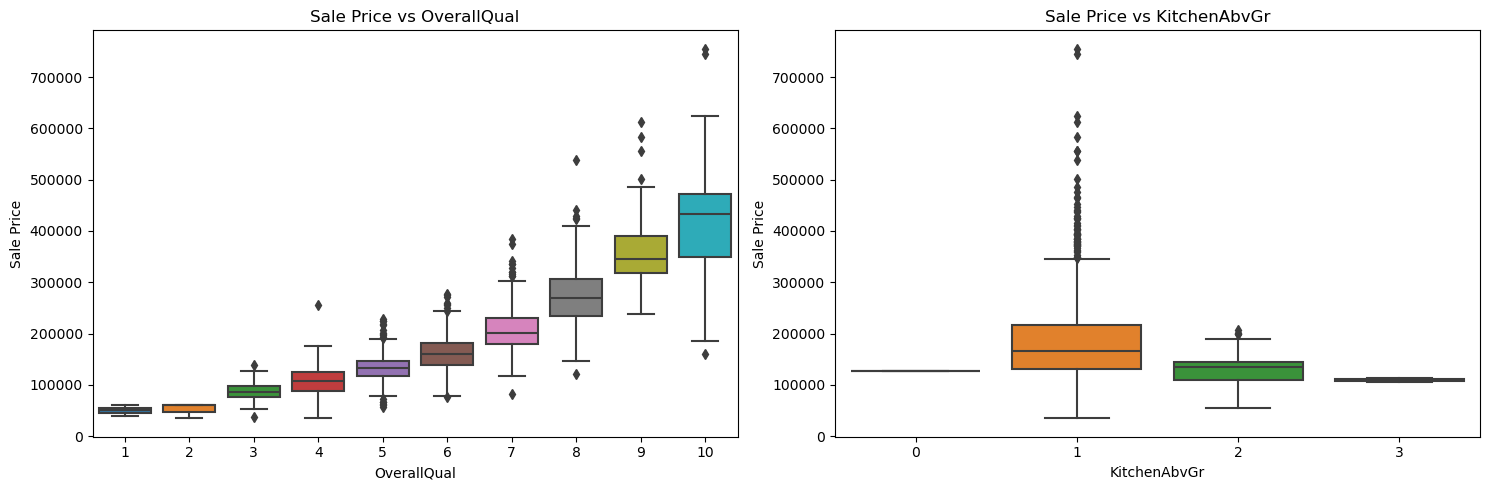

In [498]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[most_positive_corr_column],
    y=df["SalePrice"],
    ax=ax1
)

# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[most_negative_corr_column],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(f'Sale Price vs {most_positive_corr_column}')
ax1.set_xlabel(most_positive_corr_column)
ax1.set_ylabel("Sale Price")
ax2.set_title(f'Sale Price vs {most_negative_corr_column}')
ax2.set_xlabel(most_negative_corr_column)
ax2.set_ylabel("Sale Price")

plt.tight_layout()
plt.show()

Interpret the results below. Consult `data/data_description.txt` as needed.

In [689]:
# Replace None with appropriate text
"""The OverallQual column is the most positively correlated with SalePrice because the homes' Sale prices  tend to increase with conditions improved by the real estate company.The KitchenAbvGr column is the most negatively correlated with SalePrice because the homes' Sale prices tend  to decrease with increase  of kitchen room size.

"""

"The OverallQual column is the most positively correlated with SalePrice because the homes' Sale prices  tend to increase with conditions improved by the real estate company.The KitchenAbvGr column is the most negatively correlated with SalePrice because the homes' Sale prices tend  to decrease with increase  of kitchen room size.\n\n"

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [456]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

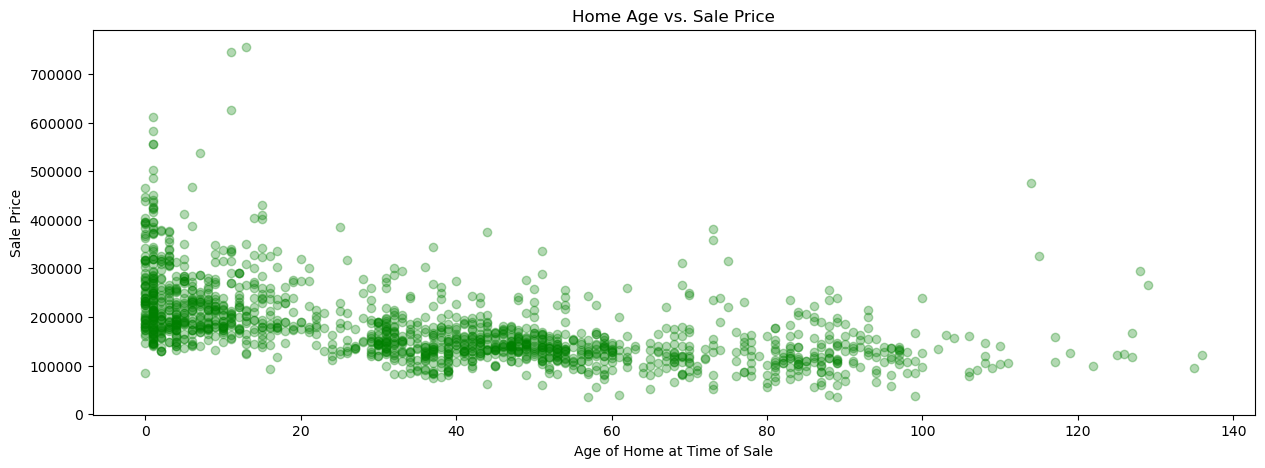

In [458]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [703]:
# Replace None with appropriate text
""" The above plot tends to show the distribution of Age of Home at Time of Sale in relation to the sale prices across the data set.The sale prices of the homes  with age of home are infuenced by the  latest design trend in that period and the quality of  homes as advertised by the real estate companies  in the market.The homes in younger age at bin 0 to 20 have highest price sales because they are the latest designs in the market trend hence having high demand. The prices tend to lower with time in relation to competitive factors of other upcoming design  trends.
"""

' The above plot tends to show the distribution of Age of Home at Time of Sale in relation to the sale prices across the data set.The sale prices of the homes  with age of home are infuenced by the  latest design trend in that period and the quality of  homes as advertised by the real estate companies  in the market.The homes in younger age at bin 0 to 20 have highest price sales because they are the latest designs in the market trend hence having high demand. The prices tend to lower with time in relation to competitive factors of other upcoming design  trends.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.